<a href="https://colab.research.google.com/github/Gehlen05/Aprendizado-Maquina/blob/main/deteteccao_fraude_rede_neural_classificacao_desbalanceada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rede Neural para Detecção de Fraude
    Neste trabalho foi desenvolvida uma rede neural para detecção de fraudes em transações de cartão de crédito.
    O dataset utilizado está disponível na kaggle. O dataset é desbalanceado como mostrado em trabalhos passados, 
    onde a parte de tratamento dos dados foi explicado nos trabalhos passados. Neste será focado na explicação do 
    desenvolvimento da rede neural.
    Link trabalho passado: 
    https://github.com/Gehlen05/Aprendizado-Maquina/blob/main/Regressao_logistica_arvore_knn_deteccao_fraude_cartao_credito.ipynb 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ast import increment_lineno
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
df.head()

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [ ]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


0    284315
1       492
Name: Class, dtype: int64


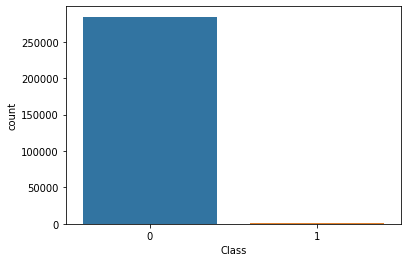

In [ ]:
target = 'Class'
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())



In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
x_train.shape

(199364, 30)

### Rede Neural
      A partir deste momento será implementado a rede neural utilizando o Tensor Flow e Keras.
      Foi definida uma rede neural com as 30 entradas do dataset, uma camada oculta de 30 neurônios 
      e uma saida, e sua função de ativação escolhida foi a relu, pois, a principal vantagem de usar 
      a função ReLU sobre outras funções de ativação é que ela não ativa todos os neurônios ao mesmo 
      tempo.
      A função de ativação de saída  foi utlizada uma sigmoide, pois, como será gerada na saída uma 
      probalidade entre 0 e 1 quanto mais próximo de 1 é uma transação fraudulenta.
      https://www.deeplearningbook.com.br/funcao-de-ativacao/

In [ ]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 30, activation='relu', input_shape=(30,)))
classifier.add(tf.keras.layers.Dense(units = 30, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

Foi utilizado o otimizador Adam, para cálculo de erro foi utilizado o binary_croosentropy pois é um problema de classificação de duas classes 0 ou 1
e o cross_entropy usa o conceito logaritmo que diminui o esforço computacional para treinar o modelo e para métrica é utlizado o accuracy, pois, a acurácia pode ser considerada uma métrica que nos dá uma 
visão geral do resultado, uma vez que ela mede o total de acertos considerando o total de observações.

In [ ]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

Esta etapa é a do treinamento, onde é passada a entrada e saida e número de épocas de treinamento desejada, 
foi determiada apenas 10 épocas de treinamento pode ser variado, deixei 10 para não demorar muito para treinar o modelo. 

In [ ]:
epochs_hist = classifier.fit(x_train, y_train, epochs=10)

Epoch 1/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 2/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 3/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 4/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 5/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 6/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 7/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 8/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 9/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 10/10
6231/6231 [==============================] - 13s 2ms/step - l

Aqui será utilizado o modelo para classificar a parte do dataset de teste.

In [ ]:
y_pred_test = classifier.predict(x_test)

2671/2671 [==============================] - 3s 1ms/step


In [ ]:
y_pred_test.shape

(85443, 1)

In [ ]:
y_test.shape

(85443,)

Nesta etapa consiste na avaliação do modelo.
Inicialmente será apresentada a matriz de confusão, a saida predita y_pred_test foi convertido para True quando seu valor for maior de 0.5.

Observando o resultado é possível ver que ele classificou corretante:

Transações legitímas: 85288

Transações fraudulentas: 109

Transações legítimas classificadas como fraude: 19

Transações fraudulentas classificadas como legítimas: 27


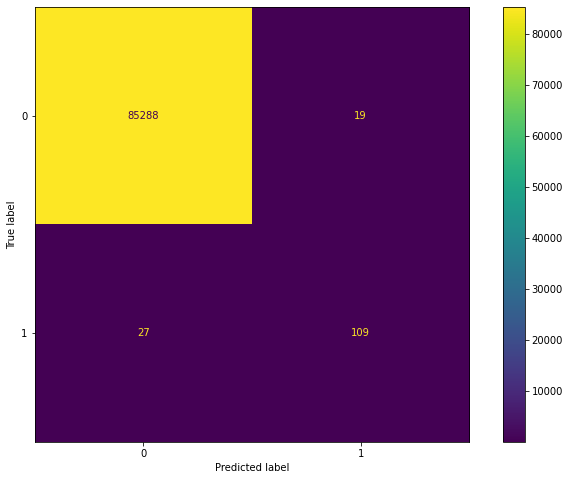

In [ ]:
y_pred_test = (y_pred_test>0.5)
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Acurácia encontrada foi de **99,94 %**



In [ ]:
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred_test))

Acurácia:  0.9994616293903538


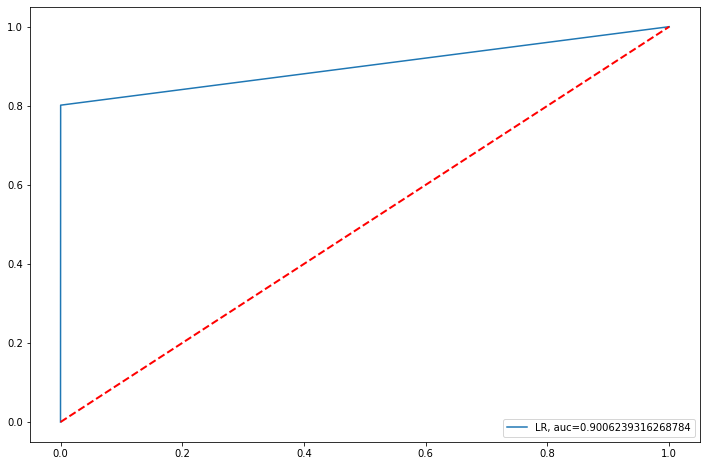

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label ="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle ='--')
plt.legend(loc=4)

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

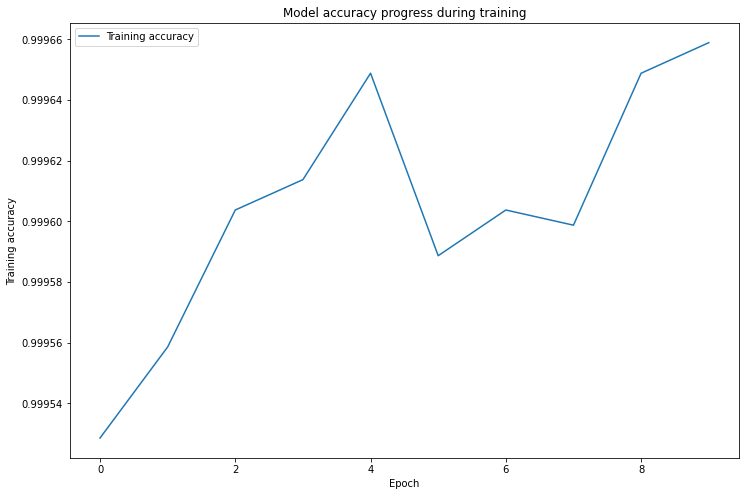

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

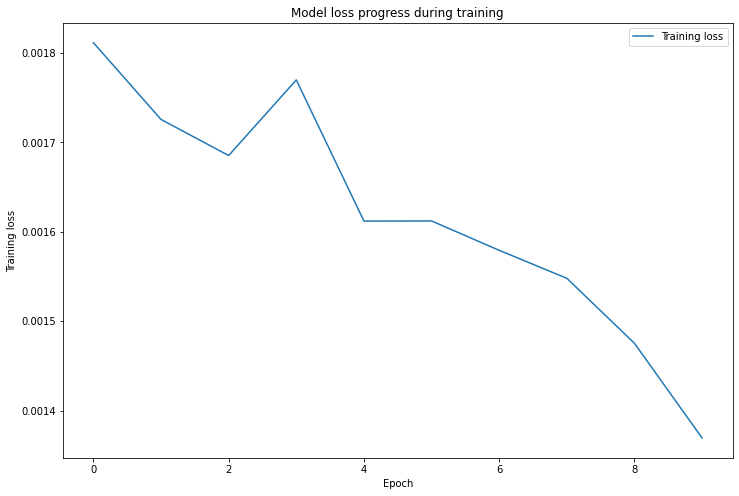

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])